## Wrangling and anayzing (@WeRateDogs) Twitter account data


### Introduction
In this project we will wrangle and analyze data from (@WeRateDogs) Twitter account. Where there is over 2500 post that rate dogs based on certain criteria.

### Project Timeline : 
 
 - Gathering 
 - Assesing 
 - Cleaning 
 - Storing snd Visualization





In [1]:
##Import some  important libraries.
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import os 

## Gathering data process

- Gathering data manually

In [2]:
##Gathering twitter archive of dogs manually.
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


- Gathering data programmatically 

In [3]:
##Gathering image prediction of dogs programmatically.
import requests 

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(url.split('/')[-1] , mode = 'wb') as file:
     file.write(response.content)
#Now the file is uploaded.

In [4]:
df_images = pd.read_csv("image-predictions.tsv" , sep = '\t')
df_images.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


- **Gathering data via Twitter API.**

**This code is provided by Udacity and it contains Twitter API code to get desirable data , this code supposed to run successfully but since i didn`t get the API access the following code will not run properly and it will be failed.**

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
 
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_dogs.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

**Because of that issue we will download the data manually from Udacity class room.** 

In [5]:
#Reading the JSON file as pandas data frame
df_json = pd.read_json('tweet-json.txt', lines= True, encoding = 'utf-8')
df_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [6]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

**We don`t need all these columns , so we will extract the required columns**.

In [7]:
#Extracting the number of retweets and favorites using JSON text file.
df_tweets = df_json.loc[:,['id','favorite_count','retweet_count']]
df_tweets.rename(columns={'id': 'tweet_id'}, inplace=True)
df_tweets.head(3)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328


## Assessing data process

 - Visual Assesment

**on this type we will check the quality of the data visually by scrolling.**













- Programmatic assesment

**on this type we will check the quality of the data programmaticly by using codes.**

##### Now start with Detect Twitter archive table.

In [8]:
#Take a look on the data
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
#Checking the datatypes of each column.
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
#Checking for outliers and take a statistcal look over the data
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
#Check the duplicates on name column.
df_archive['name'].value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Penny        10
Tucker       10
Lola         10
Winston       9
Bo            9
the           8
Sadie         8
an            7
Daisy         7
Bailey        7
Toby          7
Buddy         7
Oscar         6
Jax           6
Stanley       6
Scout         6
Rusty         6
Milo          6
Leo           6
Dave          6
Koda          6
Jack          6
Bella         6
very          5
           ... 
Rolf          1
Bert          1
Mac           1
Bauer         1
Eriq          1
Brady         1
Koko          1
Alfy          1
Karll         1
such          1
Hamrick       1
Tove          1
Suki          1
Timofy        1
Geno          1
Vince         1
Chubbs        1
Obi           1
Jerome        1
Jordy         1
by            1
Major         1
Rover         1
Tater         1
Sid           1
DayZ          1
Crouton       1
Lucia         1
Fletcher      1
Bobbay        1
Name: name, Length: 957,

In [12]:
# Checking the missing values.
sum(df_archive.name.isnull())

0

In [13]:
#Check the duplicates on rating_numerator column.
df_archive['rating_numerator'].value_counts()


12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
#The max rating value.
df_archive['rating_numerator'].max()

1776

In [15]:
#Check the rating denominator
df_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
#Checking the lowercase rows
df_archive.loc[df_archive['name'] == 'such']


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None


In [17]:
#Checking the lowercase rows
df_archive.loc[df_archive['name'] == 'old']


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1206,715758151270801409,NaN,NaN,2016-04-01 04:30:16 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is old now but it's absolutely heckin fan...,NaN,NaN,NaN,https://vine.co/v/hYdLVKDpAFu,13,10,old,None,None,None,None


In [18]:
#Checking the lowercase rows
df_archive.loc[df_archive['name'] == 'quite']


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
2326,666411507551481857,NaN,NaN,2015-11-17 00:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is quite the dog. Gets really excited whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666411507...,2,10,quite,None,None,None,None


In [19]:
#CHecking the datatype of timestamp column.
df_archive['timestamp'].dtype

dtype('O')

- Detect Images prediction table

In [20]:
#Take a look on the impage predictions data
df_images 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [21]:
#Checking the datatypes of each column.
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
#Checking for outliers and take a statistcal look over the data
df_images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
#Check the duplicates on prediction column.
df_images['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Eskimo_dog                    18
beagle                        18
teddy                         18
Maltese_dog                   18
Shetland_sheepdog             18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [24]:
#Checking the duplicated rows by checking the url since it`s impossible for two rows to be the same.

sum(df_images.jpg_url.duplicated())

66

In [25]:
df_images[df_images.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [26]:
#Checking the repeated tweets.
sum(df_images.duplicated())

0

In [27]:
#Check the duplicates on prediction column.
df_images['p1_conf'].value_counts()

0.366248    2
0.713293    2
0.375098    2
0.636169    2
0.611525    2
0.420463    2
0.581403    2
0.403698    2
0.530104    2
0.254856    2
0.346545    2
0.721188    2
0.677408    2
0.907083    2
0.243529    2
0.505370    2
0.593858    2
0.372202    2
0.274637    2
0.600276    2
0.506312    2
0.615163    2
0.556595    2
0.995143    2
0.809197    2
0.964929    2
0.777468    2
0.336200    2
0.617389    2
0.786089    2
           ..
0.483228    1
0.556524    1
0.176423    1
0.318981    1
0.733025    1
0.730152    1
0.436023    1
0.479008    1
0.162935    1
0.897162    1
0.320420    1
0.999833    1
0.995873    1
0.523206    1
0.942911    1
0.537652    1
0.672791    1
0.952258    1
0.855959    1
0.665578    1
0.841265    1
0.668164    1
0.946828    1
0.714719    1
0.352946    1
0.713102    1
0.765266    1
0.491022    1
0.905334    1
1.000000    1
Name: p1_conf, Length: 2006, dtype: int64

- Detect Twitter info table

In [28]:
#Take a look on the archive data
df_tweets

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


In [29]:
#Checking the datatypes of each column.
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [30]:
#Checking for outliers and take a statistcal look over the data
df_tweets.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


### Quality

**Twitter archieve Table :** 
- Missing values in some columns i.e (  retweeted_status_***** , in_reply_to_*******) 
- inappropriate datatypes in (tweet_id) column on all Tables and (status and retweeted user IDs ) columns on this table.
- Inaccurate row indicate that the numerator rating is 1770 and other row with rating value of 204 !
- 55 dogs with name a!! 
- Labeling null values on name column as None instead of leaveing it as NaN
- Lowercase some names such as (quite , old , such ) , i guess this is mistake and they aren`t dog names.
- Rating denominator out of 0 , this is logically unacceptable.
- inappropriate datatype in timestamp column


**Image predictions Table :** 
- Some predictions are lowercase and others are not.
- Duplicated rows , founded  by detect the url.



**tweets info Table:** 
- Two missing rows (2354) in comparison of archive Table (2356).




### Tideness

**Twitter archieve Table :** 

- There are four observations that form columns (doggo , pupper , floofer , puppo ) .   

- We can combine all tables into the main dataset Twitter archive table, it`d be tidier. (No need to split the dataset into many tables , since they all relevant).




# Cleaning data process

In [31]:
#Making a cpoy of each table
df_archive_clean = df_archive.copy()
df_images_clean = df_images.copy()
df_tweets_clean = df_tweets.copy()

## Missing data

- #### `Twitter archieve Table`: Missing values in (in_reply_to_*******) columns   (78 instead of 2356)

- #### `Twitter archieve Table`: Missing values in (retweeted_status_*****) columns   (181 instead of 2356)



#### Define 
Retweeted and replies tweet are not of our concern , So i prefer to focus solely on the original tweets of (@WeRateDogs) account.
Based on that i will drop these columns since they aren`t signifcance anymore.

### Code

In [32]:
# Saving only the nun values which is the original tweets.
df_archive_clean = df_archive_clean[df_archive_clean.in_reply_to_status_id.isnull()]

df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_user_id.isnull()]



#Droping non original tweets  columns.
df_archive_clean = df_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'  , 'retweeted_status_id' , 'retweeted_status_user_id' , 'retweeted_status_timestamp'], axis = 1)


### Test

In [33]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


## Tideness 

- **Three differnt tables with relevent data .**

### Define

Merging all tables into the main dataset by using the function `merge`.

### Code

In [34]:
#Merging all the tables into the main table.
df_archive_clean = df_archive_clean.merge(df_images_clean,on='tweet_id', how = 'inner').merge(df_tweets_clean,on='tweet_id' , how = 'inner')

### Test

In [35]:
list(df_archive_clean) 


['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorite_count',
 'retweet_count']

In [36]:
df_archive_clean.shape

(1971, 25)

In [37]:
df_archive_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,39467,8853


-  **Four observations classified as columns.**

### Define
Creating column with name Dog's breed and insert all the four kinds on it by using the function `melt`.

### Code

In [38]:
df_archive_clean = pd.melt(df_archive_clean, id_vars=[ 'tweet_id', 'favorite_count','retweet_count', 'name' , 'timestamp', 'expanded_urls', 'source' , 
   'text' , 'rating_denominator' , 'rating_numerator' , 'jpg_url' , 'img_num' , 'p1' , 'p1_conf' , 'p1_dog' , 
  'p2' , 'p2_conf' , 'p2_dog' , 'p3' , 'p3_conf' , 'p3_dog']
  ,  value_name='Dog_breed' , var_name = 'Dog') 

### Test

In [39]:
list(df_archive_clean)

['tweet_id',
 'favorite_count',
 'retweet_count',
 'name',
 'timestamp',
 'expanded_urls',
 'source',
 'text',
 'rating_denominator',
 'rating_numerator',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'Dog',
 'Dog_breed']

In [40]:
df_archive_clean = df_archive_clean.drop('Dog' , axis =1)

In [41]:
df_archive_clean.Dog_breed.dtype

dtype('O')

The dataype of dog_breed column is inappropriate , we will fix this issue ahead in Quality section.

## Quality

 - **Inappropriate datatypes in certain columns.**

### Define
Tweet_id datatype is integer whilt it's prefered to be string  and Dog_breed column datatype is string while it should be categorical.

### Code

In [42]:
df_archive_clean.Dog_breed = df_archive_clean.Dog_breed.astype('category')

df_archive_clean.tweet_id = df_archive_clean.tweet_id.astype(str)

df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp )


### Test

In [43]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7884 entries, 0 to 7883
Data columns (total 22 columns):
tweet_id              7884 non-null object
favorite_count        7884 non-null int64
retweet_count         7884 non-null int64
name                  7884 non-null object
timestamp             7884 non-null datetime64[ns]
expanded_urls         7884 non-null object
source                7884 non-null object
text                  7884 non-null object
rating_denominator    7884 non-null int64
rating_numerator      7884 non-null int64
jpg_url               7884 non-null object
img_num               7884 non-null int64
p1                    7884 non-null object
p1_conf               7884 non-null float64
p1_dog                7884 non-null bool
p2                    7884 non-null object
p2_conf               7884 non-null float64
p2_dog                7884 non-null bool
p3                    7884 non-null object
p3_conf               7884 non-null float64
p3_dog                7884 non-

In [44]:
df_archive_clean.Dog_breed.dtype

CategoricalDtype(categories=['None', 'doggo', 'floofer', 'pupper', 'puppo'], ordered=False)

In [45]:
df_archive_clean.timestamp.dtype

dtype('<M8[ns]')

In [46]:
df_archive_clean.tweet_id.dtype

dtype('O')

- Inaccurate row indicate that the numerator rating is 1770 and other row with rating value of 204 !

### Define
Replace the value of 1770 with 17 and 204 with 20 by using `replace` function.

### Code

In [47]:
df_archive_clean.rating_numerator = df_archive_clean.rating_numerator.replace(1776 , 17)
df_archive_clean.rating_numerator = df_archive_clean.rating_numerator.replace(204 , 20)

### Test

In [48]:
## Should be empty
df_archive_clean[df_archive_clean.rating_numerator == 1770]

,tweet_id,favorite_count,retweet_count,name,timestamp,expanded_urls,source,text,rating_denominator,rating_numerator,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Dog_breed


In [49]:
## Should be empty
df_archive_clean[df_archive_clean.rating_numerator == 204]

,tweet_id,favorite_count,retweet_count,name,timestamp,expanded_urls,source,text,rating_denominator,rating_numerator,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Dog_breed


- **55 Dog with name a .**

### Define 
Replace all dogs with name 'a' to None by using `replace` function.

### Code


In [50]:
df_archive_clean.name = df_archive_clean.name.replace('a' , 'None')

### Test

In [51]:
#Should be empty
df_archive_clean[df_archive_clean.name == 'a']

,tweet_id,favorite_count,retweet_count,name,timestamp,expanded_urls,source,text,rating_denominator,rating_numerator,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Dog_breed


- **Labeling null values on name column as None instead of leave it as NaN.**

### Define
Replacing All None values to NaN by uusing the function `replace`.

### Code

In [52]:
df_archive_clean['name'].replace('None', np.nan, inplace=True)
df_archive_clean['Dog_breed'].replace('None', np.nan, inplace=True)


### Test

In [53]:
df_archive_clean['name'].value_counts()

Charlie           44
Cooper            40
Oliver            40
Lucy              40
Tucker            36
Penny             36
Winston           32
Sadie             32
Daisy             28
the               28
Toby              28
Lola              28
Bo                24
an                24
Bella             24
Jax               24
Stanley           24
Koda              24
Louis             20
Oscar             20
Leo               20
Milo              20
Chester           20
Buddy             20
Bailey            20
Rusty             20
Scout             20
Dave              20
Bentley           16
Larry             16
                  ..
Darrel             4
Danny              4
Rumble             4
Blue               4
Ozzie              4
Brockly            4
Hanz               4
Lassie             4
Andru              4
Michelangelope     4
Oreo               4
Fizz               4
Kial               4
Dewey              4
Kendall            4
Amélie             4
Perry        

In [54]:
df_archive_clean[df_archive_clean.name == 'None']

,tweet_id,favorite_count,retweet_count,name,timestamp,expanded_urls,source,text,rating_denominator,rating_numerator,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Dog_breed


In [55]:
sum(df_archive_clean.name.isnull())

2316

- **Lowercase some names such as (quite , old , such ) and the others are Capitalized (Started with Capital letter ).**

### Define 
Captilize the first letter of all column by using `captlized` function.

### Code

In [56]:
df_archive_clean['name'] = df_archive_clean['name'].str.capitalize() 


### Test

In [57]:
#Should be empty
df_archive_clean.loc[df_archive_clean['name'] == 'quite']

,tweet_id,favorite_count,retweet_count,name,timestamp,expanded_urls,source,text,rating_denominator,rating_numerator,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Dog_breed


In [58]:
df_archive_clean.loc[df_archive_clean['name'] == 'Quite']

,tweet_id,favorite_count,retweet_count,name,timestamp,expanded_urls,source,text,rating_denominator,rating_numerator,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Dog_breed
134,859196978902773760,75193,25661,Quite,2017-05-02 00:04:57,https://twitter.com/dog_rates/status/859196978...,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,10,12,...,Angora,0.224218,False,malamute,0.216163,True,Persian_cat,0.128383,False,NaN
147,855459453768019968,31657,8987,Quite,2017-04-21 16:33:22,https://twitter.com/dog_rates/status/855459453...,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",10,12,...,Blenheim_spaniel,0.389513,True,Pekinese,0.188220,True,Japanese_spaniel,0.082628,True,NaN
1941,666411507551481857,459,339,Quite,2015-11-17 00:24:19,https://twitter.com/dog_rates/status/666411507...,"<a href=""http://twitter.com/download/iphone"" r...",This is quite the dog. Gets really excited whe...,10,2,...,coho,0.404640,False,barracouta,0.271485,False,gar,0.189945,False,NaN
2105,859196978902773760,75193,25661,Quite,2017-05-02 00:04:57,https://twitter.com/dog_rates/status/859196978...,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,10,12,...,Angora,0.224218,False,malamute,0.216163,True,Persian_cat,0.128383,False,NaN
2118,855459453768019968,31657,8987,Quite,2017-04-21 16:33:22,https://twitter.com/dog_rates/status/855459453...,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",10,12,...,Blenheim_spaniel,0.389513,True,Pekinese,0.188220,True,Japanese_spaniel,0.082628,True,NaN
3912,666411507551481857,459,339,Quite,2015-11-17 00:24:19,https://twitter.com/dog_rates/status/666411507...,"<a href=""http://twitter.com/download/iphone"" r...",This is quite the dog. Gets really excited whe...,10,2,...,coho,0.404640,False,barracouta,0.271485,False,gar,0.189945,False,NaN
4076,859196978902773760,75193,25661,Quite,2017-05-02 00:04:57,https://twitter.com/dog_rates/status/859196978...,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,10,12,...,Angora,0.224218,False,malamute,0.216163,True,Persian_cat,0.128383,False,NaN
4089,855459453768019968,31657,8987,Quite,2017-04-21 16:33:22,https://twitter.com/dog_rates/status/855459453...,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",10,12,...,Blenheim_spaniel,0.389513,True,Pekinese,0.188220,True,Japanese_spaniel,0.082628,True,NaN
5883,666411507551481857,459,339,Quite,2015-11-17 00:24:19,https://twitter.com/dog_rates/status/666411507...,"<a href=""http://twitter.com/download/iphone"" r...",This is quite the dog. Gets really excited whe...,10,2,...,coho,0.404640,False,barracouta,0.271485,False,gar,0.189945,False,NaN
6047,859196978902773760,75193,25661,Quite,2017-05-02 00:04:57,https://twitter.com/dog_rates/status/859196978...,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,10,12,...,Angora,0.224218,False,malamute,0.216163,True,Persian_cat,0.128383,False,NaN


In [59]:
#Should be empty
df_archive_clean.loc[df_archive_clean['name'] == 'old']

,tweet_id,favorite_count,retweet_count,name,timestamp,expanded_urls,source,text,rating_denominator,rating_numerator,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Dog_breed


- **Rating denominator out of 0 , this is logically unacceptable.**

### Define 
In order to acheive the fairness , we will make all the ratings out of 10.

### Code

In [60]:
non_10 = df_archive_clean.rating_denominator.loc[df_archive_clean['rating_denominator'] != 10]
df_archive_clean.rating_denominator = df_archive_clean.rating_denominator.replace( non_10 ,10  )


### Test 

In [61]:
df_archive_clean.rating_denominator.value_counts()

10    7884
Name: rating_denominator, dtype: int64

- **Some predictions are lowercase and others are not (captlized).**

### Define
 the predictions of The columns p1 , p2 , p3 are not on the same form. We will chnge them all to lowercase. 

### Code

In [62]:
df_archive_clean['p1'] = df_archive_clean['p1'].str.lower() 
df_archive_clean['p2'] = df_archive_clean['p2'].str.lower() 
df_archive_clean['p3'] = df_archive_clean['p3'].str.lower() 


### Test

In [63]:
list(df_archive_clean.p1)

['orange',
 'chihuahua',
 'chihuahua',
 'paper_towel',
 'basset',
 'chesapeake_bay_retriever',
 'appenzeller',
 'pomeranian',
 'irish_terrier',
 'pembroke',
 'samoyed',
 'french_bulldog',
 'pembroke',
 'french_bulldog',
 'golden_retriever',
 'whippet',
 'golden_retriever',
 'golden_retriever',
 'siberian_husky',
 'french_bulldog',
 'basset',
 'limousine',
 'pembroke',
 'mexican_hairless',
 'samoyed',
 'chihuahua',
 'kuvasz',
 'convertible',
 'french_bulldog',
 'pug',
 'blenheim_spaniel',
 'pug',
 'malamute',
 'italian_greyhound',
 'chow',
 'pug',
 'pembroke',
 'german_shepherd',
 'doberman',
 'golden_retriever',
 'chow',
 'golden_retriever',
 'eskimo_dog',
 'labrador_retriever',
 'pembroke',
 'golden_retriever',
 'web_site',
 'weimaraner',
 'saluki',
 'samoyed',
 'tusker',
 'street_sign',
 'pembroke',
 'golden_retriever',
 'chihuahua',
 'miniature_pinscher',
 'basset',
 'german_short-haired_pointer',
 'english_springer',
 'tricycle',
 'tabby',
 'vizsla',
 'italian_greyhound',
 'basset'

In [64]:
list(df_archive_clean.p2)

['bagel',
 'pekinese',
 'malamute',
 'labrador_retriever',
 'english_springer',
 'irish_terrier',
 'border_collie',
 'eskimo_dog',
 'irish_setter',
 'cardigan',
 'pomeranian',
 'labrador_retriever',
 'cardigan',
 'boxer',
 'labrador_retriever',
 'borzoi',
 'tibetan_mastiff',
 'labrador_retriever',
 'eskimo_dog',
 'pug',
 'redbone',
 'tow_truck',
 'rhodesian_ridgeback',
 'sea_lion',
 'eskimo_dog',
 'toy_terrier',
 'great_pyrenees',
 'sports_car',
 'chihuahua',
 'shower_cap',
 'shih-tzu',
 'labrador_retriever',
 'siberian_husky',
 'american_staffordshire_terrier',
 'norwich_terrier',
 'french_bulldog',
 'cardigan',
 'malinois',
 'miniature_pinscher',
 'labrador_retriever',
 'tibetan_mastiff',
 'labrador_retriever',
 'siberian_husky',
 'chesapeake_bay_retriever',
 'chihuahua',
 'labrador_retriever',
 'dhole',
 'chesapeake_bay_retriever',
 'afghan_hound',
 'angora',
 'indian_elephant',
 'umbrella',
 'norwich_terrier',
 'labrador_retriever',
 'meerkat',
 'rhodesian_ridgeback',
 'beagle',
 '

In [65]:
list(df_archive_clean.p3)

['banana',
 'papillon',
 'kelpie',
 'spatula',
 'german_short-haired_pointer',
 'indian_elephant',
 'ice_lolly',
 'pembroke',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'muzzle',
 'basenji',
 'staffordshire_bullterrier',
 'redbone',
 'saluki',
 'labrador_retriever',
 'english_setter',
 'malamute',
 'bull_mastiff',
 'weimaraner',
 'shopping_cart',
 'beagle',
 'weimaraner',
 'staffordshire_bullterrier',
 'can_opener',
 'dandie_dinmont',
 'car_wheel',
 'boston_bull',
 'siamese_cat',
 'bernese_mountain_dog',
 'kuvasz',
 'eskimo_dog',
 'staffordshire_bullterrier',
 'norfolk_terrier',
 'brabancon_griffon',
 'chihuahua',
 'norwegian_elkhound',
 'kelpie',
 'kuvasz',
 'newfoundland',
 'kuvasz',
 'dingo',
 'flat-coated_retriever',
 'cardigan',
 'cocker_spaniel',
 'golden_retriever',
 'koala',
 'golden_retriever',
 'persian_cat',
 'ibex',
 'traffic_light',
 'chihuahua',
 'cocker_spaniel',
 'clumber',
 'beagle',
 'cocker_spaniel',
 'bath_towel',
 'cardigan',
 'pembroke',
 'egyptian_cat',

- **Duplicated Rows.**

### Define 
Drop the Duplicated Rows by using `drop_duplicates` function.

### Code

In [66]:
sum(df_archive_clean.duplicated())

5600

In [67]:
df_archive_clean.drop_duplicates( inplace=True )


### Test

In [68]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2284 entries, 0 to 6720
Data columns (total 22 columns):
tweet_id              2284 non-null object
favorite_count        2284 non-null int64
retweet_count         2284 non-null int64
name                  1582 non-null object
timestamp             2284 non-null datetime64[ns]
expanded_urls         2284 non-null object
source                2284 non-null object
text                  2284 non-null object
rating_denominator    2284 non-null int64
rating_numerator      2284 non-null int64
jpg_url               2284 non-null object
img_num               2284 non-null int64
p1                    2284 non-null object
p1_conf               2284 non-null float64
p1_dog                2284 non-null bool
p2                    2284 non-null object
p2_conf               2284 non-null float64
p2_dog                2284 non-null bool
p3                    2284 non-null object
p3_conf               2284 non-null float64
p3_dog                2284 non-

## Storing and Acting on Wrangled Data



**After we finished wrangling data process , now the data is ready to make analyzation , Visualization and interpertation on them.**

### Storing

In [69]:
# Storing the clean data into csv file
df_archive_clean.to_csv('twitter_archive_master.csv' , encoding = 'utf-8' , index = False)

### Visualization

In [70]:
import seaborn as sns

- **Lets find out what is the most dog breed  presented in (@WeRateDogs) tweets.**

In [71]:

(list(df_archive_clean.Dog_breed.unique()[1:5]) , df_archive_clean.Dog_breed.value_counts())

(['doggo', 'floofer', 'pupper', 'puppo'], pupper     209
 doggo       73
 puppo       23
 floofer      8
 None         0
 Name: Dog_breed, dtype: int64)

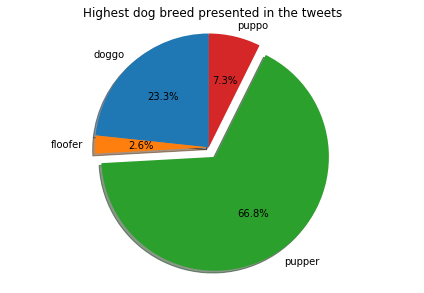

In [72]:

# Pie chart
labels = list(df_archive_clean.Dog_breed.unique()[1:5])
sizes = [73 , 8 , 209 , 23]

explode = (0, 0, 0.1, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90 , explode = explode )

ax1.axis('equal')  
plt.tight_layout()
plt.title('Highest dog breed presented in the tweets')
plt.show()

**As we can notice from the pie chart above , the pupper is the most dog breed in (@WeRatedogs) tweets with percentage of 66.8%. Next comes the doggo  with percentage of 23.3%. On 3rd place comes the puppo with percentage of 7.3%. Eventually comes the floofer with percentage of 2.6%.**  

- **Lets explore what is the dog names of the 50 highest favorite tweets.**

In [73]:
#Extracting the highest 50 favorite tweets
Drop_nulls = df_archive_clean.dropna(subset=['name'])
higest_50_favorites = Drop_nulls.sort_values("favorite_count", axis = 0, ascending = False, 
                  na_position ='last')[0:49]
print(higest_50_favorites)

                tweet_id  favorite_count  retweet_count       name  \
58    879415818425184262          107956          45849    Duddles   
397   807106840509214720          107015          56625    Stephan   
4050  866450705531457537          106827          32883     Jamesy   
108   866450705531457537          106827          32883     Jamesy   
2301  819004803107983360           95450          42228         Bo   
330   819004803107983360           95450          42228         Bo   
93    870374049280663552           85011          27680       Zoey   
134   859196978902773760           75193          25661      Quite   
262   830583320585068544           73397          19297      Lilly   
65    877736472329191424           71144          17300        Aja   
22    887473957103951883           69871          18781     Canela   
33    884925521741709313           68152          16439       Earl   
1467  676219687039057920           67100          31989    Kenneth   
269   82901196098123

Text(0.5,1,' Dog names of the 50 Highest favorite tweets')

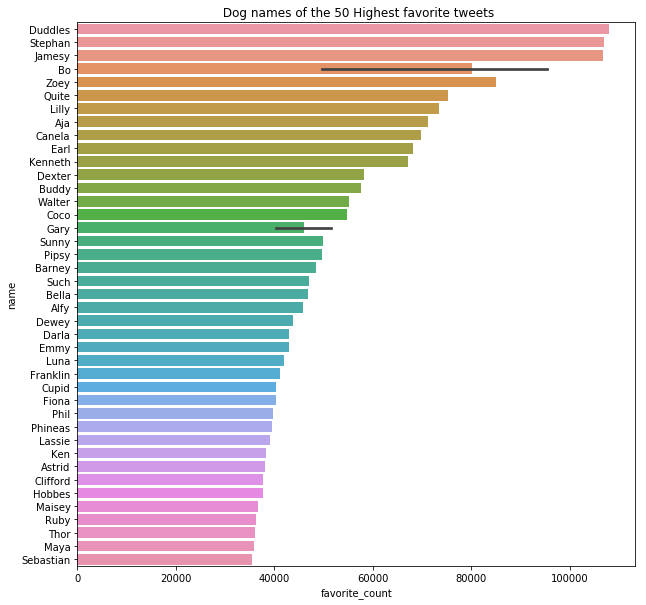

In [74]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="favorite_count", y="name", data= higest_50_favorites , ax =ax ,  )
plt.title(' Dog names of the 50 Highest favorite tweets')

**The dog with the highest favorite is Duddles with 107956 and the 50th Sebastian with 35501.** 

- **The correlation between favorites and retweets** . 

In [75]:
df_archive_clean.corr()['retweet_count'][:1] 


favorite_count    0.916152
Name: retweet_count, dtype: float64

**The correlation coefficient between favorites and retweets is 0.916 , that indicates the strong relationship between them.** 

- **Top 10 rating dogs** . 

In [76]:
#Extracting the top 10 rating dogs.
Drop_nulls = df_archive_clean.dropna(subset=['name'])
top_10_dogs = Drop_nulls.sort_values("rating_numerator", axis = 0, ascending = False, 
                  na_position ='last')[0:9]
print(top_10_dogs)

                tweet_id  favorite_count  retweet_count      name  \
499   786709082849828864           20296           7069     Logan   
918   716439118184652801            2574            247  Bluebert   
4491  778027034220126208            7320           1885    Sophie   
549   778027034220126208            7320           1885    Sophie   
382   810984652412424192            5927           1655       Sam   
842   731156023742988288            4196           1434      This   
722   749981277374128128            5569           2772   Atticus   
2648  755206590534418437           18212           6148       One   
2246  828381636999917570           13864           2554   Doobert   

               timestamp                                      expanded_urls  \
499  2016-10-13 23:23:56  https://twitter.com/dog_rates/status/786709082...   
918  2016-04-03 01:36:11  https://twitter.com/dog_rates/status/716439118...   
4491 2016-09-20 00:24:34  https://twitter.com/dog_rates/status/778027034

Text(0.5,1,'Top 10 rating dogs')

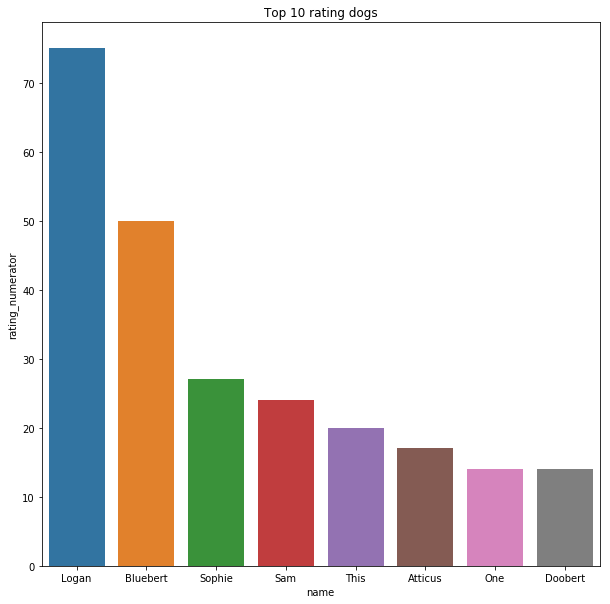

In [77]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="name", y="rating_numerator", data= top_10_dogs , ax =ax ,  )
plt.title('Top 10 rating dogs')

**It turns out that the best rating dog is Logan with 75 rating numerator.**

In [78]:
Logan = top_10_dogs[:1]
image = Logan['jpg_url']
image_url = image.values[0]


In [79]:
from IPython.display import Image

Image(url= image_url, width=300, height=300)


**He Looks smart !**